# CS 5010: 10.6 Aggregates - Abalone data
# Kip McCharen (cam7cu)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data')
df.columns = ["Sex", "Length", "Diameter", "Height", "Whole_Weight", "Shucked_Weight", "Viscera_Weight", "Shell_Weight", "Rings"]
print(df.head())

  Sex  Length  Diameter  Height  Whole_Weight  Shucked_Weight  Viscera_Weight  Shell_Weight  Rings
0   M   0.350     0.265   0.090        0.2255          0.0995          0.0485         0.070      7
1   F   0.530     0.420   0.135        0.6770          0.2565          0.1415         0.210      9
2   M   0.440     0.365   0.125        0.5160          0.2155          0.1140         0.155     10
3   I   0.330     0.255   0.080        0.2050          0.0895          0.0395         0.055      7
4   I   0.425     0.300   0.095        0.3515          0.1410          0.0775         0.120      8


## The following __ functions calculate ___ from a numpy array(s) or other values provided:

* **np.mean**: the average value
* **np.std** : the standard deviation of values
* **np.var**: the variance of values
* **np.median**: the median value
* **np.argmin**: the index of the minimum value
* **np.argmax**: the index of the maximum value
* **np.percentile**: the *n*th percentile value of all rows

In [2]:
print("Data regarding the Length value of the abalone mollusc dataset:")
print("{}: {}".format("mean".rjust(20," "),round(np.mean(df['Length']),4)))
print("{}: {}".format("median".rjust(20," "),round(np.median(df['Length']),4)))
print("{}: {}".format("standard deviation".rjust(20," "),round(np.std(df['Length']),4)))
print("{}: {}".format("variance".rjust(20," "),round(np.var(df['Length']),4)))

Data regarding the Length value of the abalone mollusc dataset:
                mean: 0.524
              median: 0.545
  standard deviation: 0.1201
            variance: 0.0144


## What are the average statistics by sex of abalone?

## and which sex has the biggest shell on average?

In [3]:
gbs = df.groupby("Sex").mean().reset_index().sort_values(by=['Shell_Weight'])
print(gbs)

  Sex    Length  Diameter    Height  Whole_Weight  Shucked_Weight  Viscera_Weight  Shell_Weight      Rings
1   I  0.427746  0.326494  0.107996      0.431363        0.191035        0.092010      0.128182   7.890462
2   M  0.561460  0.439335  0.151418      0.991772        0.433083        0.215620      0.282056  10.702685
0   F  0.579093  0.454732  0.158011      1.046532        0.446188        0.230689      0.302010  11.129304


According to the documentation, "I" stands for infant, so it is no surprise that category has the smallest shell weight. 
Female abalone were on average the largest on every scale, apparently.


# How do the different variables relate to each other?

In [4]:
corr = df.corr()
print(corr)

                  Length  Diameter    Height  Whole_Weight  Shucked_Weight  Viscera_Weight  Shell_Weight     Rings
Length          1.000000  0.986813  0.827552      0.925255        0.897905        0.903010      0.897697  0.557123
Diameter        0.986813  1.000000  0.833705      0.925452        0.893159        0.899726      0.905328  0.575005
Height          0.827552  0.833705  1.000000      0.819209        0.774957        0.798293      0.817326  0.558109
Whole_Weight    0.925255  0.925452  0.819209      1.000000        0.969403        0.966372      0.955351  0.540818
Shucked_Weight  0.897905  0.893159  0.774957      0.969403        1.000000        0.931956      0.882606  0.421256
Viscera_Weight  0.903010  0.899726  0.798293      0.966372        0.931956        1.000000      0.907647  0.504274
Shell_Weight    0.897697  0.905328  0.817326      0.955351        0.882606        0.907647      1.000000  0.628031
Rings           0.557123  0.575005  0.558109      0.540818        0.421256      

Huh well that's a lot of numbers. It's hard to tell what's what. 

Let's make a quick heatmap to see what stands out.

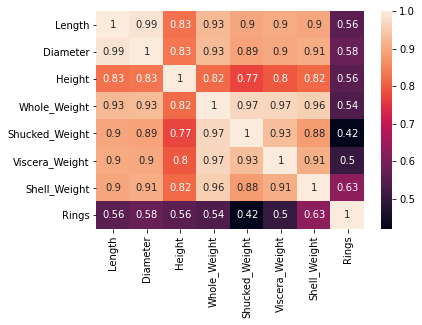

In [5]:
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True)

Much better! It's interesting that everything is highly correlated with everything else, except rings, which in turn means age. 
Apparently abalone stay the same size/weight more or less after they are no longer infants. The only exception is that they seem to lose soft body weight as they age, and in proportion they get slightly bigger shells. Unless there's more to it...

## What are the average values when grouping by rings/age?

In [6]:
df['age_group'] = pd.Categorical(pd.cut(df['Rings'], 4, labels=['1-youth','2-teen', '3-adult', '4-advanced']), ordered=True)
df.groupby('age_group')['Rings'].mean()

age_group
1-youth        6.884151
2-teen        10.779506
3-adult       17.828571
4-advanced    24.312500
Name: Rings, dtype: float64

Wow there are pretty wide age ranges! OK let's find those average values. 

In [7]:
gbs_age = df.groupby(["Sex", "age_group"]).mean().reset_index().sort_values(by=['Shell_Weight'])
print(gbs_age)

   Sex   age_group    Length  Diameter    Height  Whole_Weight  Shucked_Weight  Viscera_Weight  Shell_Weight      Rings
4    I     1-youth  0.386226  0.292305  0.095401      0.314547        0.143414        0.067133      0.091961   6.616052
8    M     1-youth  0.472609  0.364365  0.121488      0.613905        0.284838        0.132930      0.164796   7.311037
0    F     1-youth  0.510349  0.395618  0.138145      0.724626        0.330495        0.159734      0.197524   7.526882
5    I      2-teen  0.516970  0.399760  0.134028      0.672292        0.291492        0.144043      0.202491  10.275253
6    I     3-adult  0.550625  0.431042  0.162292      0.943687        0.362937        0.189146      0.293563  17.500000
9    M      2-teen  0.581056  0.455449  0.156959      1.068252        0.470339        0.234237      0.300802  10.840072
1    F      2-teen  0.589004  0.462753  0.159810      1.084477        0.467331        0.241004      0.308898  10.911912
10   M     3-adult  0.601972  0.477615  

OK this gives a clearer overall picture. Size and weight both change dramatically over an abalone's lifetime. Of course the immature abalone will not be in the higher ages. Actually it's peculiar that there are "immature" abalone in age categories 2-4. Oh well, we don't have insight into how that was evaluated. 

I wonder how I could show distributions for sex and size columns and age columns?

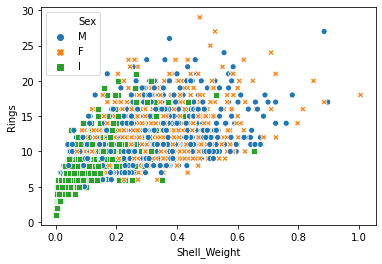

In [8]:
ax = sns.scatterplot(x="Shell_Weight", y="Rings", hue="Sex", style="Sex", data=df)

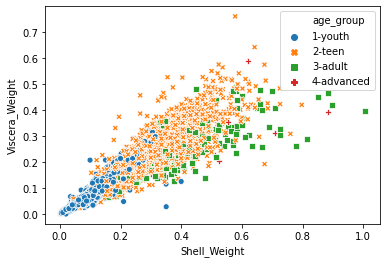

In [9]:
ax2 = sns.scatterplot(x="Shell_Weight", y="Viscera_Weight", hue="age_group", style="age_group", 
                        data=df, hue_order = ['1-youth','2-teen', '3-adult', '4-advanced'])

Awesome! The viscera/shell distribution seems to be a little muddled, what does the distribution look like without teens?

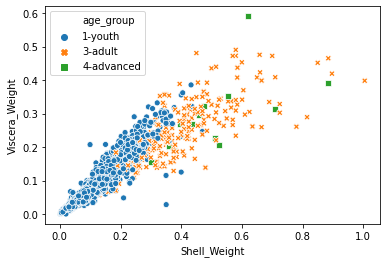

In [10]:
df_noteens = df[df.age_group.isin(['1-youth','3-adult', '4-advanced'])]
ax2 = sns.scatterplot(x="Shell_Weight", y="Viscera_Weight", hue="age_group", style="age_group", 
                        data=df_noteens, hue_order = ['1-youth','3-adult', '4-advanced'])

Ah that tells a better story! The distribution of weight grows out and about with age. 
When plotting shell weight vs viscera weight, we can see the distinct shift from Youth to Adult to Advanced.  

With more time and effort, we could understand more about what differentiates a more advanced abalone than just "bigger". 